# Time series

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.seasonal import STL

In [3]:
electricity = pd.read_csv("data/Electric_Production.csv")

In [4]:
electricity

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [5]:
electricity.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [6]:
electricity.DATE = pd.to_datetime(electricity.DATE, format = "%m/%d/%Y") # използваме параметър err когато имаме липсващи стойности

In [7]:
electricity.describe().T

,count,mean,std,min,25%,50%,75%,max
IPG2211A2N,397.0,88.847218,15.387834,55.3151,77.1052,89.7795,100.5244,129.4048


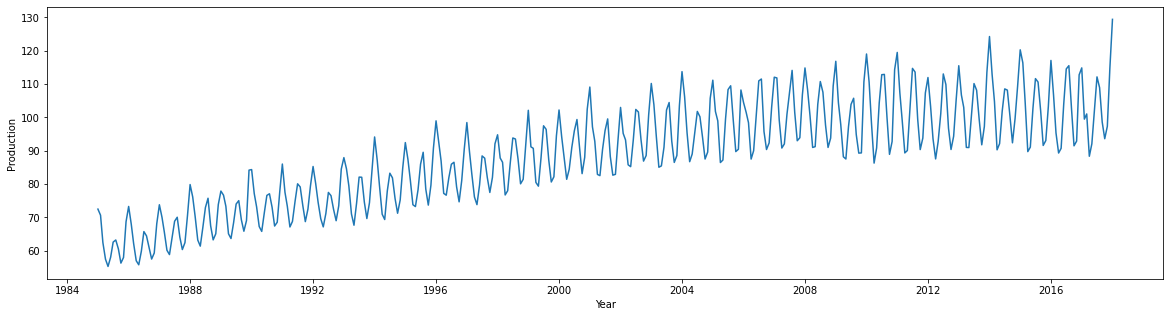

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(electricity.DATE, electricity.IPG2211A2N)

plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

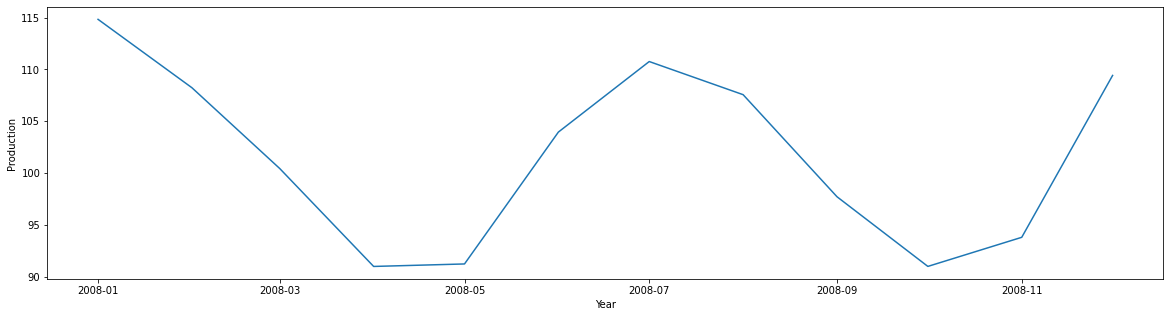

In [9]:
year_2008 = electricity[electricity.DATE.dt.year == 2008]

plt.figure(figsize=(20, 5))
plt.plot(year_2008.DATE, year_2008.IPG2211A2N)

plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

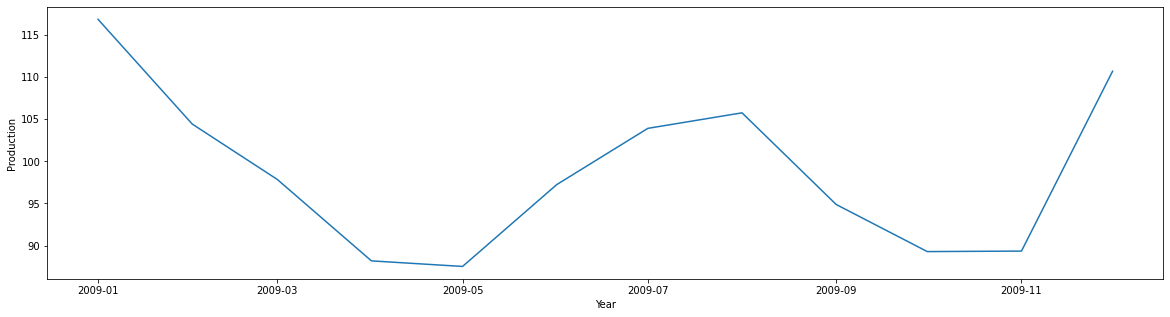

In [10]:
year_2009 = electricity[electricity.DATE.dt.year == 2009]

plt.figure(figsize=(20, 5))
plt.plot(year_2009.DATE, year_2009.IPG2211A2N)

plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

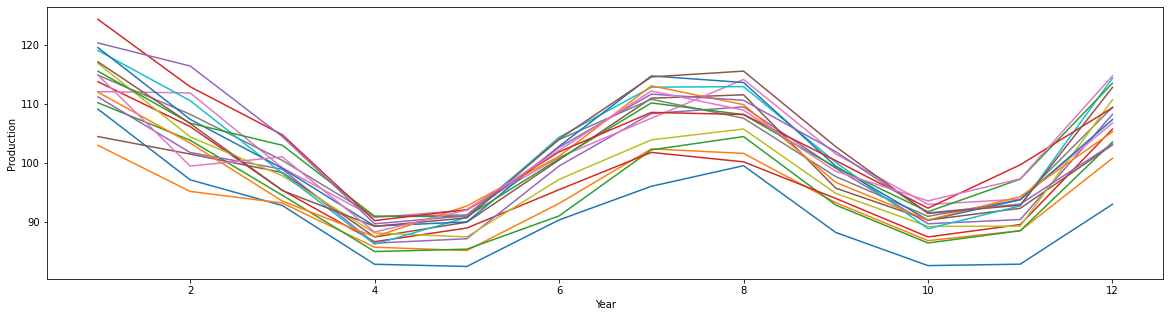

In [11]:
plt.figure(figsize=(20, 5)) # винаги създава нова фигура

for year in range(2001, 2018):
    current_year = electricity[electricity.DATE.dt.year == year]
    
    plt.plot(current_year.DATE.dt.month, current_year.IPG2211A2N)

plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

In [12]:
electricity["year"] = electricity.DATE.dt.year
electricity["month"] = electricity.DATE.dt.month

In [13]:
electricity = electricity.drop(columns = "DATE")

In [14]:
electricity

,IPG2211A2N,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [15]:
target = electricity.IPG2211A2N
attributes = electricity.drop(columns = "IPG2211A2N")

attributes_train, attributes_test, targets_train, targets_test = train_test_split(attributes, target, test_size = 0.2)

In [16]:
linear_regression = Ridge(alpha = 10)
linear_regression.fit(attributes_train, targets_train)

Ridge(alpha=10)

In [17]:
linear_regression.score(attributes_train, targets_train)

0.7141554912839194

In [18]:
linear_regression.score(attributes_test, targets_test)

0.6797993609420513

In [19]:
test_predictions = linear_regression.predict(attributes_test)

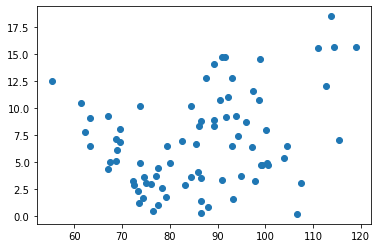

In [20]:
plt.scatter(targets_test, np.abs(test_predictions - targets_test)) # абсолютна грешка (средното от нея е MAE mean absolute error)



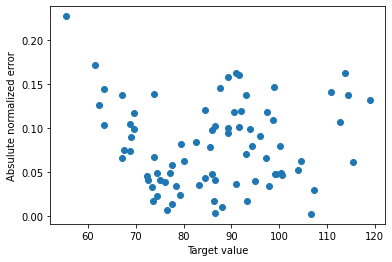

In [21]:
plt.scatter(targets_test, np.abs((test_predictions - targets_test) / targets_test)) # (O - E) / O(observed - estimated) относителна грешка

plt.xlabel("Target value")
plt.ylabel("Absulute normalized error")
plt.show()

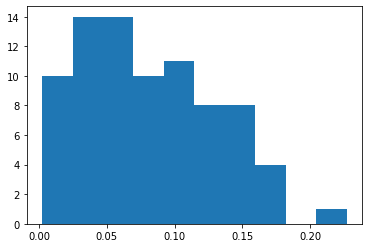

In [22]:
plt.hist(np.abs((test_predictions - targets_test) / targets_test)) # разпределението на абсолютните грешки
plt.show()

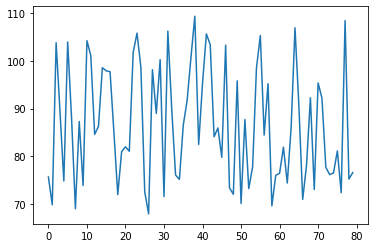

In [23]:
plt.plot(test_predictions)

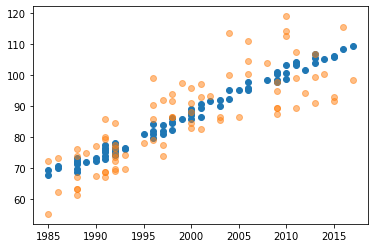

In [24]:
plt.scatter(attributes_test.year, test_predictions, label = "test predictions")
plt.scatter(attributes_test.year, targets_test, label = "target", alpha = 0.5)

# линейният модел е твърде праволинеен(в синьо)

In [25]:
# Трябва да видим до колко данните си приличат
# y = f(t) функция на времето
# Можем да сметнем подобие на две променливи
# yt yt-1 yt-2

In [26]:
electricity.shift(1) # избутва записите с 1 надолу(последният се губи)

,IPG2211A2N,year,month
0,NaN,NaN,NaN
1,72.5052,1985.0,1.0
2,70.6720,1985.0,2.0
3,62.4502,1985.0,3.0
4,57.4714,1985.0,4.0
...,...,...,...
392,108.9312,2017.0,8.0
393,98.6154,2017.0,9.0
394,93.6137,2017.0,10.0
395,97.3359,2017.0,11.0


In [27]:
electricity.shift(-1) # избутва нагоре

,IPG2211A2N,year,month
0,70.6720,1985.0,2.0
1,62.4502,1985.0,3.0
2,57.4714,1985.0,4.0
3,55.3151,1985.0,5.0
4,58.0904,1985.0,6.0
...,...,...,...
392,93.6137,2017.0,10.0
393,97.3359,2017.0,11.0
394,114.7212,2017.0,12.0
395,129.4048,2018.0,1.0


In [28]:
electricity

,IPG2211A2N,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [29]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(1))

0.8717308657532125

In [30]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(3))

0.5355867575850728

In [31]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(12))

0.9745298544620412

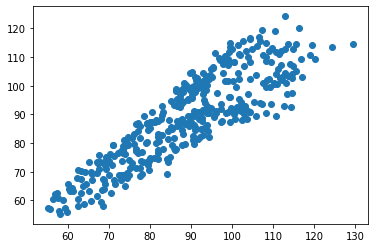

In [32]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(1))

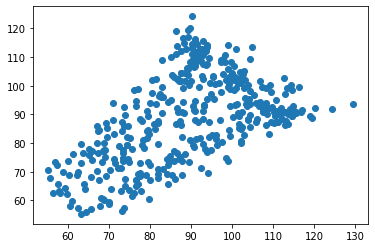

In [33]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(3))

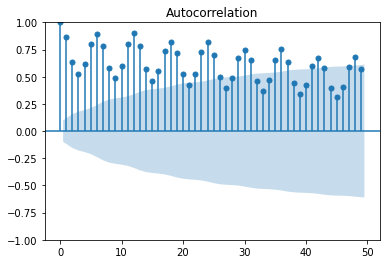

In [34]:
plot_acf(electricity.IPG2211A2N, lags = range(50)) # функция на автокорелация(променливата със себе си) 
plt.show()

#виждаме че има периодичност
# синята област показва доверителният интервал за грешка

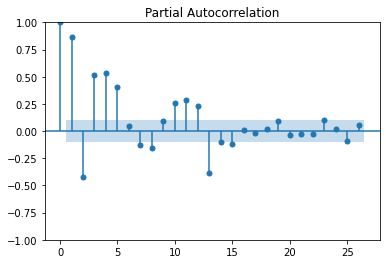

In [35]:
# относителното влияние (разликата между предното и настоящето)
plot_pacf(electricity.IPG2211A2N, method='ywm')
plt.show()

In [36]:
electricity_24 = electricity.copy()
for lag in range(1, 25):
    electricity_24[f"lag{lag}"] = electricity_24.IPG2211A2N.shift(lag)

In [37]:
electricity_24

,IPG2211A2N,year,month,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
0,72.5052,1985,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.6720,1985,2,72.5052,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62.4502,1985,3,70.6720,72.5052,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57.4714,1985,4,62.4502,70.6720,72.5052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55.3151,1985,5,57.4714,62.4502,70.6720,72.5052,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,...,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959,101.9204
393,93.6137,2017,10,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
394,97.3359,2017,11,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
395,114.7212,2017,12,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203


In [38]:
electricity_24 = electricity_24.dropna() # не е голям проблем

In [39]:
electricity_24

,IPG2211A2N,year,month,lag1,lag2,lag3,lag4,lag5,lag6,lag7,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
24,73.8152,1987,1,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,...,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
25,70.0620,1987,2,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,...,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
26,65.6100,1987,3,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,...,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
27,60.1586,1987,4,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,...,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
28,58.8734,1987,5,60.1586,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,...,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,...,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959,101.9204
393,93.6137,2017,10,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
394,97.3359,2017,11,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
395,114.7212,2017,12,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203


In [40]:
target = electricity_24.IPG2211A2N
attributes = electricity_24.drop(columns = "IPG2211A2N")

attributes_train, attributes_test, targets_train, targets_test = train_test_split(attributes, target, test_size = 0.2)

In [41]:
attributes_train

,year,month,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
372,2016,1,103.2203,93.0628,91.5959,101.9204,110.5925,111.6354,102.6495,91.0930,...,92.3837,100.4172,108.1940,108.5497,101.8780,92.1340,90.2867,104.7631,112.8811,124.2549
389,2017,6,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,...,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959,101.9204,110.5925,111.6354,102.6495
211,2002,8,102.3930,93.1896,85.2351,85.7950,93.2556,95.2075,102.9955,93.0381,...,82.5465,82.9150,92.8283,97.1717,109.1081,102.4558,88.0410,83.1408,90.9178,99.3704
34,1987,11,60.3789,64.1151,70.0669,68.8694,63.8918,58.8734,60.1586,65.6100,...,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005
91,1992,8,77.5081,71.2078,67.1784,69.6441,74.5275,80.1643,85.2855,79.4894,...,68.8162,67.1500,73.3650,77.5573,86.0214,77.6839,68.5665,67.4365,73.0610,77.1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2002,2,102.9955,93.0381,82.9319,82.6860,88.2810,99.5534,96.0740,90.3955,...,88.0410,83.1408,90.9178,99.3704,95.9957,91.0406,84.4552,81.4425,88.0927,94.2989
140,1996,9,86.5562,85.9606,81.9306,76.6826,77.2214,86.9356,92.8883,98.9732,...,78.3026,73.2682,73.8167,81.2661,87.4033,92.4532,84.8147,75.2458,71.2661,75.6826
356,2014,9,108.1940,108.5497,101.8780,92.1340,90.2867,104.7631,112.8811,124.2549,...,100.6957,90.9634,91.0092,102.9948,106.7340,115.5010,105.2722,94.3417,90.3805,96.7431
241,2005,2,111.1614,105.7263,89.6144,87.5262,94.0240,100.2025,101.7948,95.5045,...,88.5735,86.5047,92.9135,104.4682,102.2200,91.0761,85.4653,85.0620,94.5532,103.8413


In [42]:
linear_ar_model = Ridge(alpha = 1)
linear_ar_model.fit(attributes_train, targets_train)

Ridge(alpha=1)

In [43]:
linear_ar_model.score(attributes_train, targets_train)

0.9696441245250687

In [44]:
linear_ar_model.score(attributes_test, targets_test)

0.9613614746611109

In [45]:
test_predictions = linear_ar_model.predict(attributes_test)

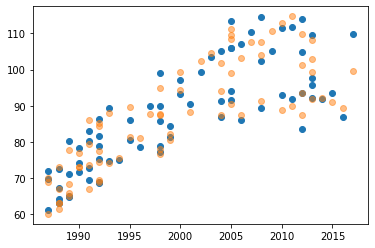

In [46]:
plt.scatter(attributes_test.year, test_predictions, label = "test predictions")
plt.scatter(attributes_test.year, targets_test, label = "target", alpha = 0.5)

In [47]:
electricity

,IPG2211A2N,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [48]:
electricity_12 = electricity.copy()
for lag in [1, 2, 4, 12]:
    electricity_12[f"lag{lag}"] = electricity_12.IPG2211A2N.shift(lag)

In [49]:
electricity_12

,IPG2211A2N,year,month,lag1,lag2,lag4,lag12
0,72.5052,1985,1,NaN,NaN,NaN,NaN
1,70.6720,1985,2,72.5052,NaN,NaN,NaN
2,62.4502,1985,3,70.6720,72.5052,NaN,NaN
3,57.4714,1985,4,62.4502,70.6720,NaN,NaN
4,55.3151,1985,5,57.4714,62.4502,72.5052,NaN
...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,92.0805,102.7637
393,93.6137,2017,10,98.6154,108.9312,102.1532,91.4867
394,97.3359,2017,11,93.6137,98.6154,112.1538,92.8900
395,114.7212,2017,12,97.3359,93.6137,108.9312,112.7694


In [50]:
electricity_12 = electricity_12.dropna()

In [51]:
target = electricity_12.IPG2211A2N
attributes = electricity_12.drop(columns = "IPG2211A2N")

attributes_train, attributes_test, targets_train, targets_test = train_test_split(attributes, target, test_size = 0.2)

In [52]:
linear_ar_model = Ridge(alpha = 1)
linear_ar_model.fit(attributes_train, targets_train)

Ridge(alpha=1)

In [53]:
linear_ar_model.score(attributes_train, targets_train)

0.9581379923846852

In [54]:
linear_ar_model.score(attributes_test, targets_test)

0.9698808244315732

In [55]:
test_predictions = linear_ar_model.predict(attributes_test)

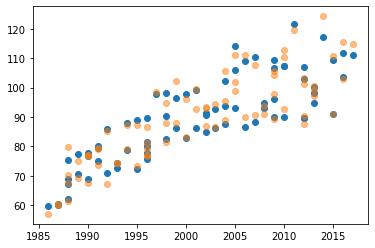

In [56]:
plt.scatter(attributes_test.year, test_predictions, label = "test predictions")
plt.scatter(attributes_test.year, targets_test, label = "target", alpha = 0.5)

# горе долу еднакви резултати, но имаме по-малко променлви

In [57]:
electricity_12

,IPG2211A2N,year,month,lag1,lag2,lag4,lag12
12,73.3057,1986,1,68.7145,58.0005,60.5846,72.5052
13,67.9869,1986,2,73.3057,68.7145,56.3154,70.6720
14,62.2221,1986,3,67.9869,73.3057,58.0005,62.4502
15,57.0329,1986,4,62.2221,67.9869,68.7145,57.4714
16,55.8137,1986,5,57.0329,62.2221,73.3057,55.3151
...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,92.0805,102.7637
393,93.6137,2017,10,98.6154,108.9312,102.1532,91.4867
394,97.3359,2017,11,93.6137,98.6154,112.1538,92.8900
395,114.7212,2017,12,97.3359,93.6137,108.9312,112.7694


In [58]:
linear_ar_model.coef_
#виждаме, че месеца е важен а годината не(можем да я махнем)

array([-0.02320036,  0.121669  ,  0.49846546, -0.31813861,  0.13488399,
        0.6563609 ])

In [59]:
# see ARMA models - модели, които правят някакъв вид линейна регресия с помощта на функциите на автокорелация и частна корелация
# see STL models 

In [60]:
electricity_48 = electricity.copy()
for lag in range(48):
    electricity_48[f"lag{lag}"] = electricity_48.IPG2211A2N.shift(lag)

In [61]:
electricity_48 = electricity_48.dropna()

In [62]:
target = electricity_48.IPG2211A2N
attributes = electricity_48.drop(columns = "IPG2211A2N")

attributes_train, attributes_test, targets_train, targets_test = train_test_split(attributes, target, test_size = 0.2)

In [63]:
pca = PCA(n_components = 0.98)

In [64]:
pca.fit(attributes_train)

PCA(n_components=0.98)

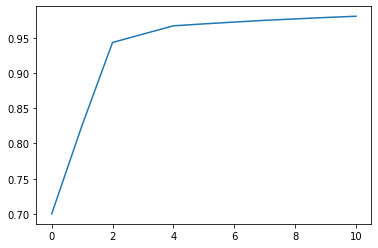

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [66]:
linear_ar_model = Ridge(alpha = 10)
linear_ar_model.fit(attributes_train, targets_train)

Ridge(alpha=10)

In [67]:
linear_ar_model.score(attributes_train, targets_train)

0.9999986447107517

In [68]:
linear_ar_model.score(attributes_test, targets_test)

0.9999975677054859

In [69]:
test_predictions = linear_ar_model.predict(attributes_test)

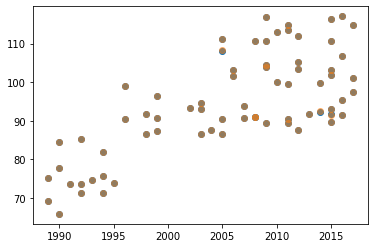

In [70]:
plt.scatter(attributes_test.year, test_predictions, label = "test predictions")
plt.scatter(attributes_test.year, targets_test, label = "target", alpha = 0.5)

In [71]:
# see Markov chain and Monte carlo symulation
# pymc

In [72]:
stl = STL(electricity.IPG2211A2N, period = 12)

In [73]:
result = stl.fit()

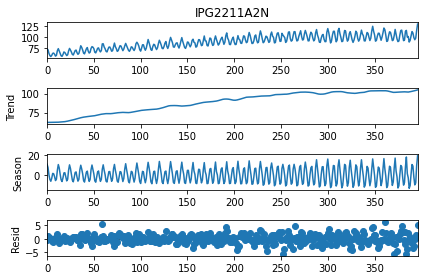

In [74]:
result.plot()
plt.show()

# първо получаваме локалната променлива
# второ изгладената версия
# трето разликата между 1 и 2
# последно е случаен шум
# 2+3+4 = 1

## Predict future sales

In [75]:
sales = pd.read_csv("data/sales_train.csv")

In [76]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [77]:
sales.date = pd.to_datetime(sales.date, format = "%d.%m.%Y")

In [78]:
sales.shop_id.unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

In [79]:
sales.shop_id.value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

In [80]:
sales[(sales.shop_id == 31) & (sales.date == "2013/07/01")].sum()

C:\Users\stoic\AppData\Local\Temp\ipykernel_4276\4023504691.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sales[(sales.shop_id == 31) & (sales.date == "2013/07/01")].sum()


date_block_num       1698.0
shop_id              8773.0
item_id           3419141.0
item_price         150264.0
item_cnt_day          348.0
dtype: float64

In [81]:
shop_31 = sales[sales.shop_id == 31]

In [82]:
total_counts = shop_31.groupby("date").item_cnt_day.sum()

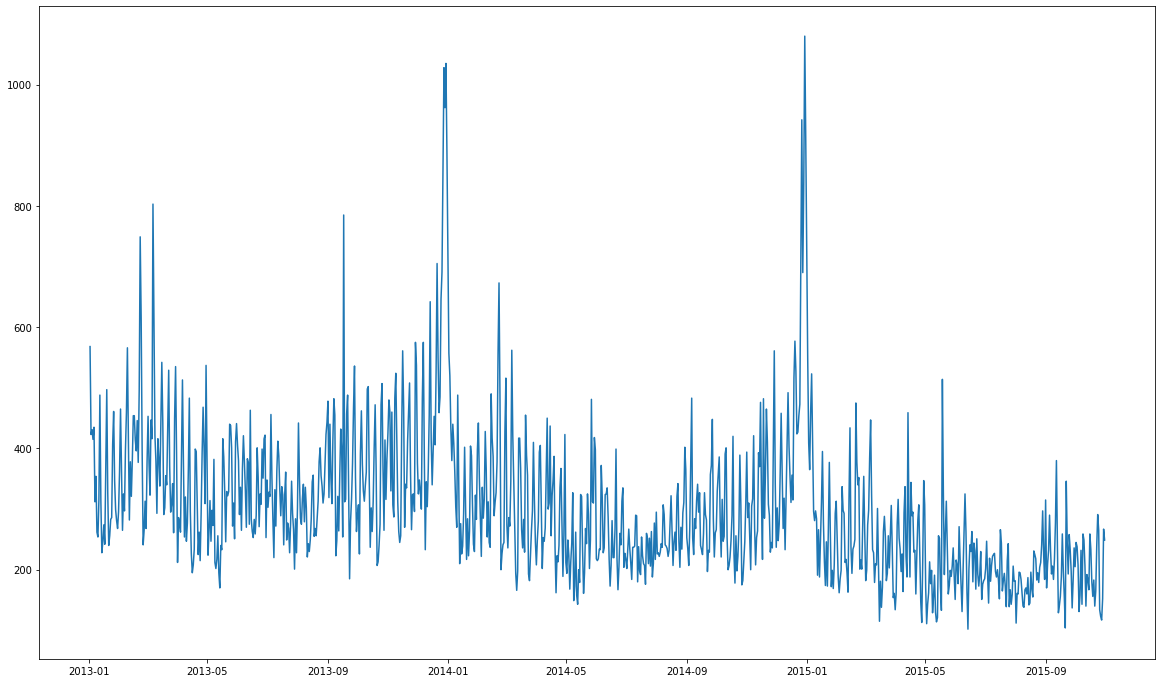

In [83]:
plt.figure(figsize = (20, 12))
plt.plot(total_counts.index, total_counts)
plt.show()

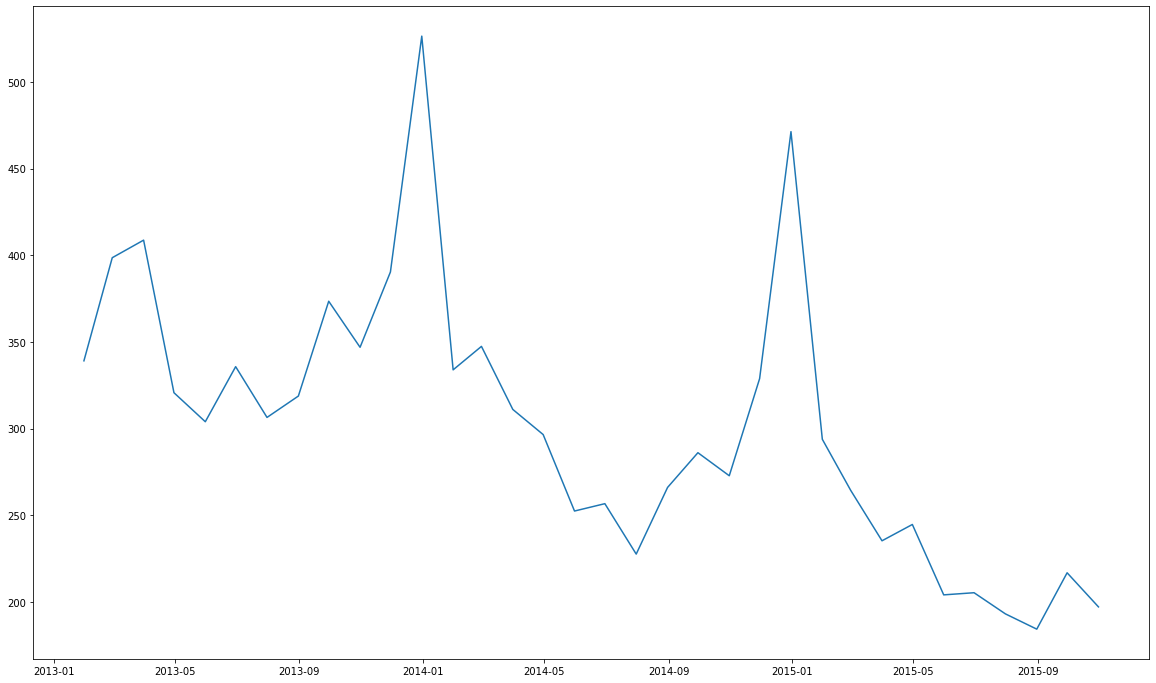

In [84]:
monthly_means = total_counts.resample("1M").mean()

plt.figure(figsize = (20, 12))
plt.plot(monthly_means.index, monthly_means)
plt.show()

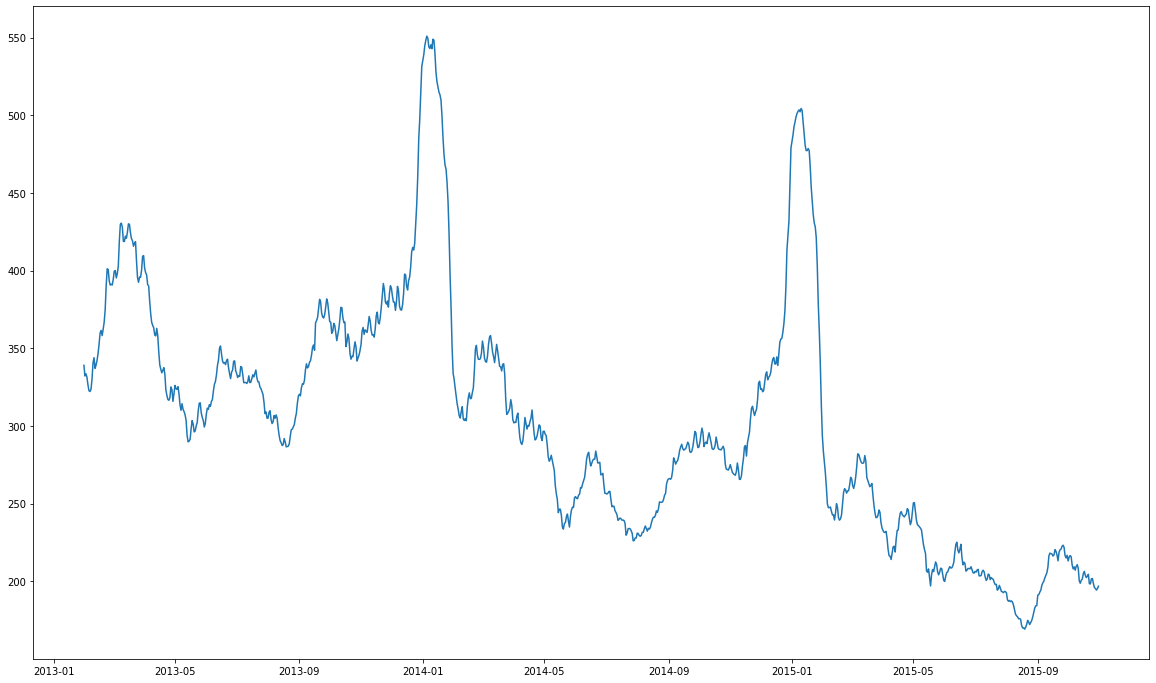

In [85]:
rolling_means = total_counts.rolling(30).mean().dropna()

plt.figure(figsize = (20, 12))
plt.plot(rolling_means.index, rolling_means)
plt.show()

In [86]:
sales.item_id.nunique() # high cardinality

21807

In [87]:
shop_31 = shop_31.sort_values(["item_id", "date"]).reset_index(drop = True)

In [88]:
shop_31 = shop_31.drop(columns = ["date_block_num"])

In [89]:
shop_31

,date,shop_id,item_id,item_price,item_cnt_day
0,2014-10-16,31,26,58.0,1.0
1,2013-01-18,31,27,2499.0,1.0
2,2013-01-02,31,28,549.0,1.0
3,2013-01-12,31,28,549.0,1.0
4,2013-01-16,31,28,549.0,1.0
...,...,...,...,...,...
235631,2015-05-06,31,22167,299.0,1.0
235632,2015-06-11,31,22167,299.0,1.0
235633,2015-07-13,31,22167,299.0,1.0
235634,2015-07-27,31,22167,299.0,1.0


In [90]:
shop_31.item_id.value_counts()

20949    863
5822     602
17717    478
7856     436
4181     400
        ... 
10573      1
18601      1
10571      1
10568      1
26         1
Name: item_id, Length: 14416, dtype: int64

In [91]:
shop_31_item_20949 = shop_31[shop_31.item_id == 20949]

In [92]:
shop_31_item_20949

,date,shop_id,item_id,item_price,item_cnt_day
224196,2013-04-26,31,20949,5.0,5.0
224197,2013-04-28,31,20949,5.0,1.0
224198,2013-04-29,31,20949,5.0,1.0
224199,2013-04-30,31,20949,5.0,6.0
224200,2013-05-01,31,20949,5.0,1.0
...,...,...,...,...,...
225054,2015-10-27,31,20949,5.0,9.0
225055,2015-10-28,31,20949,5.0,2.0
225056,2015-10-29,31,20949,5.0,10.0
225057,2015-10-30,31,20949,5.0,17.0


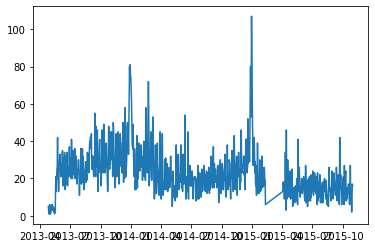

In [93]:
plt.plot(shop_31_item_20949.date, shop_31_item_20949.item_cnt_day) # липсващите данни си личат на графиката като свързване м-у две точки
plt.show()

In [94]:
shop_31_item_20949.date.diff() # дава разликите във времето

224196      NaT
224197   2 days
224198   1 days
224199   1 days
224200   1 days
          ...  
225054   1 days
225055   1 days
225056   1 days
225057   1 days
225058   1 days
Name: date, Length: 863, dtype: timedelta64[ns]

In [96]:
# shop_31_item_20949 = shop_31_item_20949.copy()
# for shift in range(1, 10):
#      shop_31_item_20949[f"lag_{shift}"] = shop_31_item_20949.shift(shift)
        
# for diff in [1, 2, 5, 10]:
#         shop_31_item_20949[f"lag_{diff}"] = shop_31_item_20949.diff(diff)